<div align=center>

# Handwritten Digit Classification

By Hamed Araab

Supervisor: Dr. Marzieh Zarinbal

</div>


## Description

In this mini-project, you are given the MNIST dataset which contains `28×28`
black-and-white images of handwritten digits. The train and test splits contain
`60,000` and `10,000` images, respectively.

You are asked to develop and train a deep neural network (DNN) to tackle this
task using the implementation that you learned earlier. Remember to choose the
hyperparameters of your model, especially the activation and loss functions,
according to the type of the challenge you are facing.


## Setup

First of all, set up the environment.


In [43]:
%run ../implementation.ipynb

In [44]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical

In [45]:
np.set_printoptions(formatter={"float": lambda x: "{:.2f}".format(x)})

## Dataset

Load the train and test splits using the `mnist` module.


In [46]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

You can see that each row represents an image.


In [47]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Data Preprocessing

You must change the data in various ways before feeding it to a neural network
since it's not suitable at the current stage.


### Normalization

First you must normalize the input matrices.


In [48]:
X_train.min(), X_train.max()

(0, 255)

In [49]:
X_train = X_train / 255
X_test = X_test / 255

In [50]:
X_train.min(), X_train.max()

(0.0, 1.0)

### One-Hot Encoding

Then you should perform one-hot encoding on the `1` to `9` values in the output
matrices, transforming them to categorical data. Try using `to_categorical`.


In [51]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

### Flattening Images

You must transform each `28×28` image to an array with shape `(1, 784)`.


In [52]:
X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## Data Visualization

To get an idea of how the images look like, you can see some of them with their
labels below.


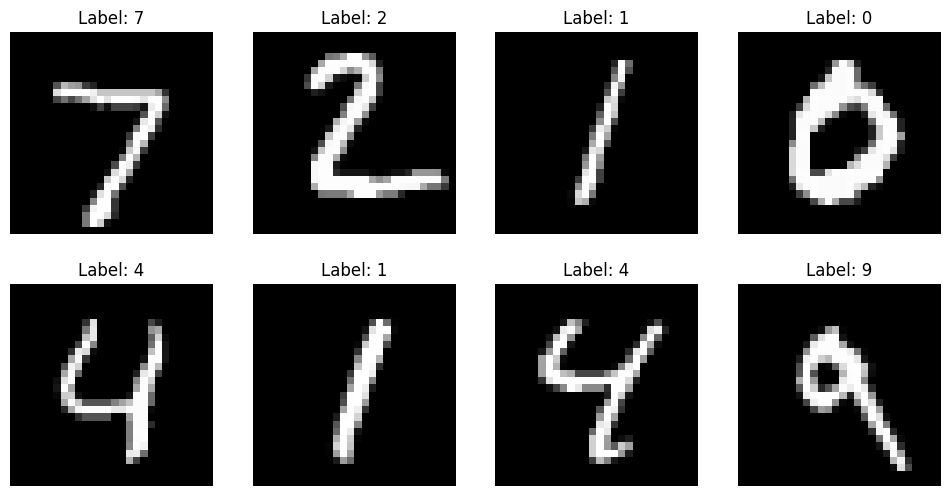

In [53]:
sample_images = X_test[:8, :].reshape(8, 28, 28)
sample_labels = Y_test[:8, :]

plt.figure(figsize=(12, 6))

for i in range(sample_images.shape[0]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[i, :, :], cmap="gray")
    plt.title(f"Label: {sample_labels[i, :].argmax()}")
    plt.axis("off")

plt.show()

## DNN Development

Now that you have prepared your data to be fed to a DNN, you can declare your
model with the hyperparameters of your choice.


In [54]:
np.random.seed(1)

model = NeuralNetwork(
    input_size=784,
    layers=[
        FullyConnectedLayer(units=14, activation_function=Sigmoid()),
        FullyConnectedLayer(units=14, activation_function=Sigmoid()),
        FullyConnectedLayer(units=10, activation_function=Softmax()),
    ],
    loss_function=CCELoss(),
    learning_rate=0.2,
)

model.train(
    X_train,
    Y_train,
    epochs=10,
    batch_size=32,
    test_data=(X_test, Y_test),
)

Starting the training process...
Trainable parameters: 11350
Epoch: 1/10, cost: 1.096, cost_test: 0.564
Epoch: 2/10, cost: 0.494, cost_test: 0.416
Epoch: 3/10, cost: 0.390, cost_test: 0.355
Epoch: 4/10, cost: 0.336, cost_test: 0.316
Epoch: 5/10, cost: 0.300, cost_test: 0.301
Epoch: 6/10, cost: 0.274, cost_test: 0.273
Epoch: 7/10, cost: 0.256, cost_test: 0.270
Epoch: 8/10, cost: 0.242, cost_test: 0.256
Epoch: 9/10, cost: 0.232, cost_test: 0.246
Epoch: 10/10, cost: 0.222, cost_test: 0.245


Let's see what is your model's predictions for the images we sampled earlier.


In [55]:
Y_sample_hat = model.predict(sample_images.reshape(8, 784))
sample_predict_labels = Y_sample_hat.argmax(axis=1, keepdims=True)

print(f"Predicted Labels: {sample_predict_labels}")
print(f"\nPrediction Matrix:\n{Y_sample_hat}")

Predicted Labels: [[7]
 [2]
 [1]
 [0]
 [4]
 [1]
 [4]
 [9]]

Prediction Matrix:
[[0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00]
 [0.00 0.00 0.96 0.04 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.99 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.04 0.00 0.00 0.00 0.00 0.95]]
